In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import talib

sys.path.append('../src') 

from utils.data_loader import load_data

# Load data
df = load_data('../data/META_cleaned.csv')


Data loaded successfully from ../data/META_cleaned.csv


1. Prepare data

2. Apply Technical Indicators with TA-Lib

2.1 Moving Averages

In [2]:
# Simple Moving Averages
df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
df['SMA_50'] = talib.SMA(df['Close'], timeperiod=50)
df['SMA_200'] = talib.SMA(df['Close'], timeperiod=200)

# Exponential Moving Averages
df['EMA_20'] = talib.EMA(df['Close'], timeperiod=20)
df['EMA_50'] = talib.EMA(df['Close'], timeperiod=50)

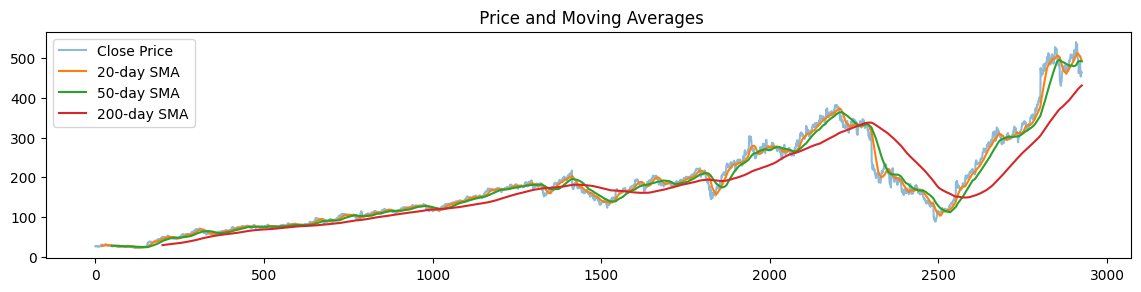

In [3]:
plt.figure(figsize=(14, 10))

# Price and Moving Averages
plt.subplot(3, 1, 1)
plt.plot(df['Close'], label='Close Price', alpha=0.5)
plt.plot(df['SMA_20'], label='20-day SMA')
plt.plot(df['SMA_50'], label='50-day SMA')
plt.plot(df['SMA_200'], label='200-day SMA')
plt.title(f' Price and Moving Averages')
plt.legend()

2.2 Relative Strength Index (RSI)

In [4]:
df['RSI_14'] = talib.RSI(df['Close'], timeperiod=14)

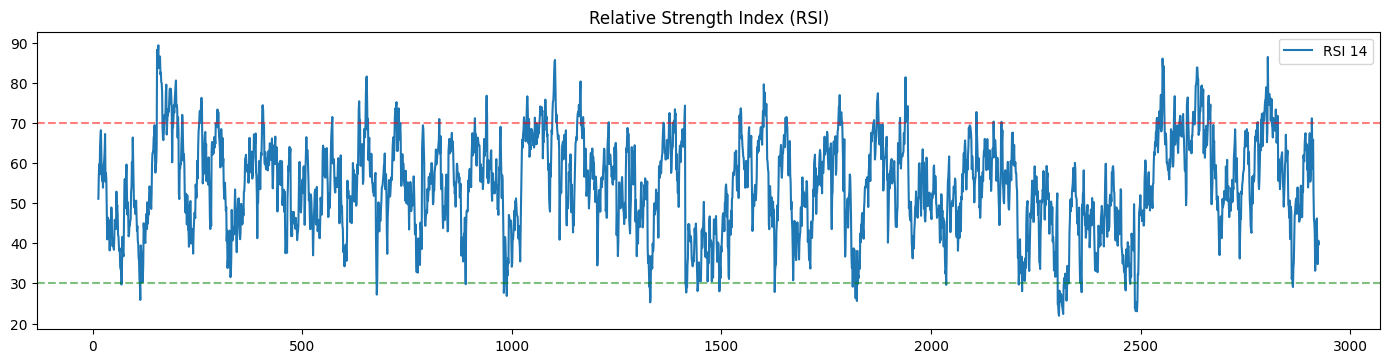

In [8]:
# RSI
plt.figure(figsize=(14, 10))
plt.subplot(3, 1, 2)
plt.plot(df['RSI_14'], label='RSI 14')
plt.axhline(70, linestyle='--', color='r', alpha=0.5)
plt.axhline(30, linestyle='--', color='g', alpha=0.5)
plt.title('Relative Strength Index (RSI)')
plt.legend()
plt.tight_layout()
plt.show()

2.3 MACD (Moving Average Convergence Divergence)

In [7]:
macd, macdsignal, macdhist = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
df['MACD'] = macd
df['MACD_Signal'] = macdsignal
df['MACD_Hist'] = macdhist

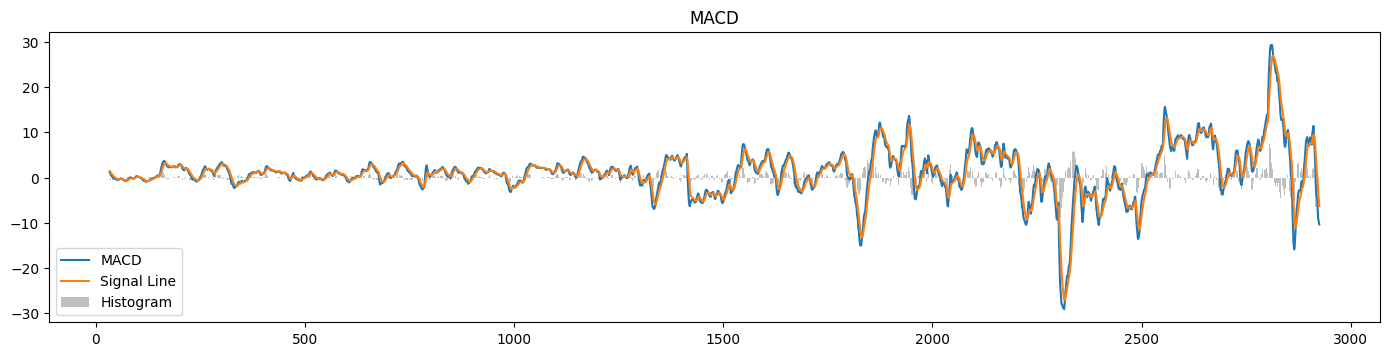

In [10]:
#MACD
plt.figure(figsize=(14, 10))
plt.subplot(3, 1, 3)
plt.plot(df['MACD'], label='MACD')
plt.plot(df['MACD_Signal'], label='Signal Line')
plt.bar(df.index, df['MACD_Hist'], label='Histogram', color='gray', alpha=0.5)
plt.title('MACD')
plt.legend()
plt.tight_layout()
plt.show()

3. PyNance for Financial Metrics

In [13]:
df.index


RangeIndex(start=0, stop=2926, step=1)

In [42]:
import pynance as pn

# Convert numeric index to proper datetime
df.index = pd.to_datetime(df.index, unit='ns')  # or unit='s' depending on your data


# Now fetch new data using those dates
df_pynance = pn.data.get('META', start="2012-12-12", end="2024-07-30")

# Preview result
print(df_pynance.head())


               Open     High     Low   Close    Volume
Date                                                  
2024-07-30  467.000  472.730  456.70  463.19  11390439
2024-07-29  469.880  473.960  465.02  465.71  11339630
2024-07-26  464.195  469.770  459.42  465.70  14222388
2024-07-25  463.260  463.548  442.65  453.41  18240489
2024-07-24  472.305  476.300  460.58  461.27  17649738


In [44]:
# Income Statement
income = pn.financials.income('META')
print("Income Statement:", income)

# Balance Sheet
balance = pn.financials.balance('META')
print("Balance Sheet:", balance)

# Cash Flow Statement
cashflow = pn.financials.cashflow('META')
print("Cash Flow:", cashflow)


AttributeError: module 'pynance' has no attribute 'financials'

In [ ]:
#Use Yfinace for alternative
import yfinance as yf

# Download META (Facebook) data
df_meta = yf.download("META", start="2012-12-12", end="2024-07-30")

# Display
df_meta

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,META,META,META,META,META
Date,,,,,
2012-12-12,27.450628,28.008001,27.241614,27.868658,46704200
2012-12-13,28.107529,28.615137,27.301329,27.460578,81051600
2012-12-14,26.684237,28.197107,26.634472,28.047811,91631600
2012-12-17,26.624519,26.873347,26.196536,26.644426,57742500
2012-12-18,27.580015,27.779078,26.773815,26.833533,60512900
...,...,...,...,...,...
2024-07-23,487.397125,493.909848,486.429690,488.544077,9455500
2024-07-24,460.049622,475.039856,459.361445,471.060422,17649700


In [45]:

# Create a ticker object
meta = yf.Ticker("META")

# Get income statement
income_stmt = meta.income_stmt
print("Income Statement:")
print(income_stmt)

# Get balance sheet
balance_sheet = meta.balance_sheet
print("\nBalance Sheet:")
print(balance_sheet)

# Get cash flow statement
cash_flow = meta.cashflow
print("\nCash Flow Statement:")
print(cash_flow)

Income Statement:
                                                        2024-12-31  \
Tax Effect Of Unusual Items                            -81420000.0   
Tax Rate For Calcs                                           0.118   
Normalized EBITDA                                    87566000000.0   
Total Unusual Items                                   -690000000.0   
Total Unusual Items Excluding Goodwill                -690000000.0   
Net Income From Continuing Operation Net Minori...   62360000000.0   
Reconciled Depreciation                              15498000000.0   
Reconciled Cost Of Revenue                           30161000000.0   
EBITDA                                               86876000000.0   
EBIT                                                 71378000000.0   
Net Interest Income                                   1973000000.0   
Interest Expense                                       715000000.0   
Interest Income                                       2517000000.0   
No

In [51]:
revenue = income_stmt.loc['Total Revenue'][0]
net_income = income_stmt.loc['Net Income'][0]
total_assets = balance_sheet.loc['Total Assets'][0]
operating_cashflow = cash_flow.loc['Operating Cash Flow'][0]

print(f"Revenue: ${revenue:,}")
print(f"Net Income: ${net_income:,}")
print(f"Total Assets: ${total_assets:,}")
print(f"Operating Cash Flow: ${operating_cashflow:,}")


Revenue: $164,501,000,000.0
Net Income: $62,360,000,000.0
Total Assets: $276,054,000,000.0
Operating Cash Flow: $91,328,000,000.0


C:\Users\user\AppData\Local\Temp\ipykernel_28508\3280448161.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  revenue = income_stmt.loc['Total Revenue'][0]
C:\Users\user\AppData\Local\Temp\ipykernel_28508\3280448161.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  net_income = income_stmt.loc['Net Income'][0]
C:\Users\user\AppData\Local\Temp\ipykernel_28508\3280448161.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_as